In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
english_data = pd.read_csv('../data/2023/english.csv')
not_english_data = pd.read_csv('../data/2023/not_english.csv')

C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\1869905544.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  english_data = pd.read_csv('../data/2023/english.csv')
C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\1869905544.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  not_english_data = pd.read_csv('../data/2023/not_english.csv')


In [4]:
nteng_sample = not_english_data[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'Positivity', 'Question Num']]
nteng_sample['Opt-1'] = round((nteng_sample['Option 1'] / nteng_sample['Responses']) * 100, 1)
nteng_sample['Opt-2'] = round((nteng_sample['Option 2'] / nteng_sample['Responses']) * 100, 1)
nteng_sample['Opt-3'] = round((nteng_sample['Option 3'] / nteng_sample['Responses']) * 100, 1)
nteng_sample['Opt-4'] = round((nteng_sample['Option 4'] / nteng_sample['Responses']) * 100, 1)
nteng_sample.head()

C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\1427943907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nteng_sample['Opt-1'] = round((nteng_sample['Option 1'] / nteng_sample['Responses']) * 100, 1)
C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\1427943907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nteng_sample['Opt-2'] = round((nteng_sample['Option 2'] / nteng_sample['Responses']) * 100, 1)
C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\1427943907.py:4: SettingWithCopyWarning: 
A value is tr

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
0,236.0,59.0,153.0,18.0,6.0,NaN,89.8,Q01,25.0,64.8,7.6,2.5
1,236.0,49.0,148.0,34.0,5.0,NaN,83.5,Q02,20.8,62.7,14.4,2.1
2,236.0,152.0,77.0,6.0,1.0,NaN,97.0,Q03,64.4,32.6,2.5,0.4
3,236.0,109.0,100.0,25.0,2.0,NaN,88.6,Q04,46.2,42.4,10.6,0.8
4,234.0,92.0,108.0,29.0,5.0,NaN,85.5,Q05,39.3,46.2,12.4,2.1


In [5]:
nteng_options = nteng_sample[['Opt-1', 'Opt-2', 'Opt-3', 'Opt-4', 'Positivity']]
nteng_options.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78111 entries, 0 to 78110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Opt-1       78111 non-null  float64
 1   Opt-2       78111 non-null  float64
 2   Opt-3       78111 non-null  float64
 3   Opt-4       78111 non-null  float64
 4   Positivity  78111 non-null  float64
dtypes: float64(5)
memory usage: 3.0 MB


In [6]:
nteng_options.head()

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
0,25.0,64.8,7.6,2.5,89.8
1,20.8,62.7,14.4,2.1,83.5
2,64.4,32.6,2.5,0.4,97.0
3,46.2,42.4,10.6,0.8,88.6
4,39.3,46.2,12.4,2.1,85.5


In [7]:
num_rows = 27
num_sets = len(nteng_options) // num_rows
reshaped_data = nteng_options.values.reshape(num_sets, num_rows, 5)

train_data = reshaped_data[:, :26, :4]
test_data = reshaped_data[:, 26, :4]
X = reshaped_data[:, :26, :4].reshape(-1, 26 * 4)
y = reshaped_data[:, 26, :4].reshape(-1, 4)

In [8]:
print(X.shape)
print(y.shape)

(2893, 104)
(2893, 4)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [10]:
# model_new = Sequential()

# model_new.add(Dense(256, input_dim=104, activation='relu', kernel_regularizer=l2(0.001)))

# model_new.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
# model_new.add(BatchNormalization())
# model_new.add(Dropout(0.3))

# model_new.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
# model_new.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
# model_new.add(BatchNormalization())
# model_new.add(Dropout(0.3))

# model_new.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
# model_new.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
# model_new.add(Dense(4, activation='linear'))

# model_new.compile(optimizer='adam', loss='mean_squared_error')
# history_new = model_new.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# loss_new = model_new.evaluate(X_test, y_test)
# print("Test Loss:", loss_new)

In [12]:
model_new = tf.keras.models.load_model('../models/model-options-23-04.keras')

In [13]:
sample_input = X_test[0].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
predicted_output = np.round(predicted_output, 1)
# print("Sample Input:", X_test[0])
# print("Input Shape:", X_test[0].shape)
print("Predicted Output:", predicted_output[0])
print("Actual Output:", y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Predicted Output: [75.4 18.4  1.   0.6]
Actual Output: [78.3 21.7  0.   0. ]


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Absolute Error (MAE) - Train: 2.389557580939634
Mean Squared Error (MSE) - Train: 9.40995717838896
R² Score - Train: 0.8786737562961495


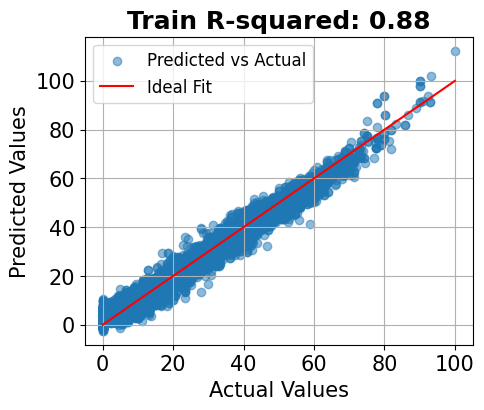

Mean Absolute Error (MAE) - Test: 3.0643077198448174
Mean Squared Error (MSE) - Test: 17.266974460923333
R² Score - Test: 0.8072124820020208


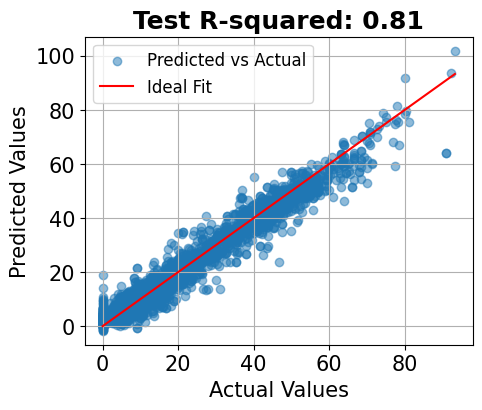

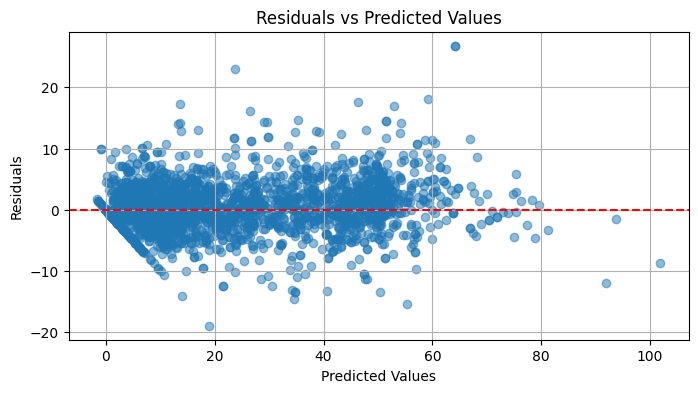

In [14]:
# Predictions
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

# Performance metrics for training data
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

# Print performance metrics for training data
print(f"Mean Absolute Error (MAE) - Train: {mae_train}")
print(f"Mean Squared Error (MSE) - Train: {mse_train}")
print(f"R² Score - Train: {r2_train}")

# Plot actual vs predicted values for training data
plt.figure(figsize=(5, 4))
plt.scatter(y_train, predictions_train, alpha=0.5, label='Predicted vs Actual')
plt.plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title(f'Train R-squared: {round(r2_train, 2)}', fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Performance metrics for test data
mae_test = mean_absolute_error(y_test, predictions)
mse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

# Print performance metrics for test data
print(f"Mean Absolute Error (MAE) - Test: {mae_test}")
print(f"Mean Squared Error (MSE) - Test: {mse_test}")
print(f"R² Score - Test: {r2_test}")

# Plot actual vs predicted values for test data
plt.figure(figsize=(5, 4))
plt.scatter(y_test, predictions, alpha=0.5, label='Predicted vs Actual')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title(f'Test R-squared: {round(r2_test, 2)}', fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(8, 4))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

In [15]:
# model_new.compile(optimizer='adam', loss='mean_squared_error')
# history_new = model_new.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# loss_new = model_new.evaluate(X_test, y_test)
# print("Test Loss:", loss_new)

In [16]:
# print(history_new.history.keys())
# # summarize history for loss
# plt.plot(history_new.history['loss'])
# plt.plot(history_new.history['val_loss'])
# plt.title('Model-02 Loss Curves', fontsize=18, weight='bold')
# plt.ylabel('Loss',fontsize=15)
# plt.xlabel('Epoch',fontsize=15)
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)
# plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
# plt.show()

In [17]:
# model_new.save('../models/model-options-23-04.keras')

In [18]:
# Predictions
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
predictions_rounded = np.round(predictions, 1)

sum_predicted = np.sum(predictions_rounded[:, :2], axis=1)
test_predictions_df = pd.DataFrame(predictions_rounded, columns=[f'Test_Pred_{i}' for i in range(predictions_rounded.shape[1])])
test_predictions_df['Test_Pred'] = sum_predicted
test_predictions_df = test_predictions_df.astype('float')
test_predictions_df = test_predictions_df.round(1)

sum_predicted = np.sum(y_test[:, :2], axis=1)
test_actual_df = pd.DataFrame(y_test, columns=[f'Test_Actual_{i}' for i in range(y_test.shape[1])])
test_actual_df['Test_Actual'] = sum_predicted

In [20]:
predictions_rounded = np.round(predictions_train, 1)
sum_predicted = np.sum(predictions_rounded[:, :2], axis=1)
train_predictions_df = pd.DataFrame(predictions_rounded, columns=[f'Train_Pred_{i}' for i in range(predictions_rounded.shape[1])])
train_predictions_df['Train_Pred'] = sum_predicted
train_predictions_df = train_predictions_df.astype('float')
train_predictions_df = train_predictions_df.round(1)

sum_predicted = np.sum(y_train[:, :2], axis=1)
train_actual_df = pd.DataFrame(y_train, columns=[f'Train_Actual_{i}' for i in range(y_train.shape[1])])
train_actual_df['Train_Actual'] = sum_predicted

In [21]:
test_compare = pd.DataFrame()
test_compare['Pred'] = test_predictions_df['Test_Pred']
test_compare['Actual'] = test_actual_df['Test_Actual']
test_compare['Pred_0'] = test_predictions_df['Test_Pred_0']
test_compare['Actual_0'] = test_actual_df['Test_Actual_0']
test_compare['Pred_1'] = test_predictions_df['Test_Pred_1']
test_compare['Actual_1'] = test_actual_df['Test_Actual_1']
test_compare['Pos_Diff'] = test_compare['Pred'] - test_compare['Actual']
test_compare['0_Diff'] = test_compare['Pred_0'] - test_compare['Actual_0']
test_compare['1_Diff'] = test_compare['Pred_1'] - test_compare['Actual_1']

train_compare = pd.DataFrame()
train_compare['Pred'] = train_predictions_df['Train_Pred']
train_compare['Actual'] = train_actual_df['Train_Actual']
train_compare['Pred_0'] = train_predictions_df['Train_Pred_0']
train_compare['Actual_0'] = train_actual_df['Train_Actual_0']
train_compare['Pred_1'] = train_predictions_df['Train_Pred_1']
train_compare['Actual_1'] = train_actual_df['Train_Actual_1']
train_compare['Pos_Diff'] = train_compare['Pred'] - train_compare['Actual']
train_compare['0_Diff'] = train_compare['Pred_0'] - train_compare['Actual_0']
train_compare['1_Diff'] = train_compare['Pred_1'] - train_compare['Actual_1']

In [22]:
train_compare.head()

,Pred,Actual,Pred_0,Actual_0,Pred_1,Actual_1,Pos_Diff,0_Diff,1_Diff
0,81.8,82.2,32.6,29.3,49.2,52.9,-0.4,3.3,-3.7
1,96.3,95.0,38.4,35.0,57.9,60.0,1.3,3.4,-2.1
2,90.9,92.8,55.1,57.1,35.8,35.7,-1.9,-2.0,0.1
3,79.4,87.8,25.7,26.8,53.7,61.0,-8.4,-1.1,-7.3
4,77.5,81.8,18.4,18.2,59.1,63.6,-4.3,0.2,-4.5


In [23]:
test_compare.head()

,Pred,Actual,Pred_0,Actual_0,Pred_1,Actual_1,Pos_Diff,0_Diff,1_Diff
0,93.8,100.0,75.4,78.3,18.4,21.7,-6.2,-2.9,-3.3
1,81.5,80.8,40.0,46.2,41.5,34.6,0.7,-6.2,6.9
2,78.6,77.3,22.6,21.3,56.0,56.0,1.3,1.3,0.0
3,89.7,99.4,45.7,50.8,44.0,48.6,-9.7,-5.1,-4.6
4,90.4,92.1,51.1,54.3,39.3,37.8,-1.7,-3.2,1.5


In [24]:
train_compare.describe().iloc[1][6:]

Pos_Diff   -2.120527
0_Diff     -1.394857
1_Diff     -0.725670
Name: mean, dtype: float64

In [25]:
test_compare.describe().iloc[1][6:]

Pos_Diff   -2.191883
0_Diff     -1.084801
1_Diff     -1.107081
Name: mean, dtype: float64

In [26]:
eng_sample = english_data[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'Positivity', 'Question Num']]
eng_sample['Opt-1'] = round((eng_sample['Option 1'] / eng_sample['Responses']) * 100, 1)
eng_sample['Opt-2'] = round((eng_sample['Option 2'] / eng_sample['Responses']) * 100, 1)
eng_sample['Opt-3'] = round((eng_sample['Option 3'] / eng_sample['Responses']) * 100, 1)
eng_sample['Opt-4'] = round((eng_sample['Option 4'] / eng_sample['Responses']) * 100, 1)
eng_sample.head()

C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\3128618196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_sample['Opt-1'] = round((eng_sample['Option 1'] / eng_sample['Responses']) * 100, 1)
C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\3128618196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_sample['Opt-2'] = round((eng_sample['Option 2'] / eng_sample['Responses']) * 100, 1)
C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\3128618196.py:4: SettingWithCopyWarning: 
A value is trying to be s

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
0,189.8,49.82,125.13,14.33,0.5,NaN,92.2,Q01,26.2,65.9,7.6,0.3
1,189.8,23.99,124.30,35.99,5.5,NaN,78.1,Q02,12.6,65.5,19.0,2.9
2,189.5,81.14,83.48,22.83,2.0,NaN,86.9,Q03,42.8,44.1,12.0,1.1
3,189.8,77.63,86.82,23.33,2.0,NaN,86.7,Q04,40.9,45.7,12.3,1.1
4,189.8,69.47,97.31,21.50,1.5,NaN,87.9,Q05,36.6,51.3,11.3,0.8


In [27]:
eng_options = eng_sample[['Opt-1', 'Opt-2', 'Opt-3', 'Opt-4', 'Positivity']]
eng_options.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294732 entries, 0 to 294731
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Opt-1       294732 non-null  float64
 1   Opt-2       294732 non-null  float64
 2   Opt-3       294732 non-null  float64
 3   Opt-4       294732 non-null  float64
 4   Positivity  294732 non-null  float64
dtypes: float64(5)
memory usage: 11.2 MB


In [28]:
reshaped_data = eng_options.values.reshape((10916, 27, 5))
english_26_options = reshaped_data[:, :26, :4].reshape(10916, 26*4)

In [29]:
predictions_new = model_new.predict(english_26_options)

342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
predictions_new[0]

array([25.771212, 51.316364, 12.599042,  8.319382], dtype=float32)

In [31]:
unique = english_data[['Provider name', 'Level of study', 'Subject', 'Subject code']]
unique['Combined'] = unique['Provider name'] + '//' + unique['Level of study'] + '//' + unique['Subject'] + '//' + unique['Subject code']
unique.drop(columns=['Provider name', 'Level of study', 'Subject', 'Subject code'], inplace=True)
df = pd.DataFrame({'Combined':unique['Combined'].unique()})

C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\2990925539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['Combined'] = unique['Provider name'] + '//' + unique['Level of study'] + '//' + unique['Subject'] + '//' + unique['Subject code']
C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\2990925539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique.drop(columns=['Provider name', 'Level of study', 'Subject', 'Subject code'], inplace=True)


In [32]:
pred_rounded = []
for i in range(len(predictions_new)):
  set_list = []
  for val in predictions_new[i]:
    set_list.append(round(float(val), 1))
  pred_rounded.append(set_list)

df['Predicted_28_Options'] = pred_rounded
df.head()

,Combined,Predicted_28_Options
0,England//All undergraduates//Medical sciences ...,"[25.8, 51.3, 12.6, 8.3]"
1,England//All undergraduates//Medicine (non-spe...,"[26.9, 46.4, 12.2, 9.4]"
2,England//All undergraduates//Medicine by speci...,"[20.5, 50.5, 18.2, 9.4]"
3,England//All undergraduates//Dentistry//CAH01-...,"[28.5, 41.4, 12.4, 10.5]"
4,England//All undergraduates//Pharmacology//CAH...,"[31.4, 47.6, 11.6, 6.2]"


In [33]:
df[['Provider', 'Level', 'Subject', 'Code']] = df['Combined'].str.split('//', expand=True)
df.drop(columns=['Combined'], inplace=True)
df.head()

,Predicted_28_Options,Provider,Level,Subject,Code
0,"[25.8, 51.3, 12.6, 8.3]",England,All undergraduates,Medical sciences (non-specific),CAH01-01-01
1,"[26.9, 46.4, 12.2, 9.4]",England,All undergraduates,Medicine (non-specific),CAH01-01-02
2,"[20.5, 50.5, 18.2, 9.4]",England,All undergraduates,Medicine by specialism,CAH01-01-03
3,"[28.5, 41.4, 12.4, 10.5]",England,All undergraduates,Dentistry,CAH01-01-04
4,"[31.4, 47.6, 11.6, 6.2]",England,All undergraduates,Pharmacology,CAH02-02-01


In [34]:
float(str(df['Predicted_28_Options'][0])[1:-1].replace(' ', '').split(',')[0])

25.8

In [35]:
float(str(df['Predicted_28_Options'][0]).replace(' ', '').replace('[', '').replace(']', '').split(',')[0])

25.8

In [36]:
# def options_split(option_list):
#   a, b, c, d = str(option_list).replace(' ', '').replace('[', '').replace(']', '').split(',')
#   return float(a), float(b), float(c), float(d)

# sa, a, da, sda = options_split(df['Predicted_28_Options'][0])
# print(a)

In [37]:
df.head()

,Predicted_28_Options,Provider,Level,Subject,Code
0,"[25.8, 51.3, 12.6, 8.3]",England,All undergraduates,Medical sciences (non-specific),CAH01-01-01
1,"[26.9, 46.4, 12.2, 9.4]",England,All undergraduates,Medicine (non-specific),CAH01-01-02
2,"[20.5, 50.5, 18.2, 9.4]",England,All undergraduates,Medicine by specialism,CAH01-01-03
3,"[28.5, 41.4, 12.4, 10.5]",England,All undergraduates,Dentistry,CAH01-01-04
4,"[31.4, 47.6, 11.6, 6.2]",England,All undergraduates,Pharmacology,CAH02-02-01


In [38]:
df_split = df['Predicted_28_Options'].apply(pd.Series)
df_split.columns = ['Strongly-Agree', 'Agree', 'Disagree', 'Strongly-Disagree']
df = df.drop('Predicted_28_Options', axis=1).join(df_split, rsuffix='_new')
df.head()

,Provider,Level,Subject,Code,Strongly-Agree,Agree,Disagree,Strongly-Disagree
0,England,All undergraduates,Medical sciences (non-specific),CAH01-01-01,25.8,51.3,12.6,8.3
1,England,All undergraduates,Medicine (non-specific),CAH01-01-02,26.9,46.4,12.2,9.4
2,England,All undergraduates,Medicine by specialism,CAH01-01-03,20.5,50.5,18.2,9.4
3,England,All undergraduates,Dentistry,CAH01-01-04,28.5,41.4,12.4,10.5
4,England,All undergraduates,Pharmacology,CAH02-02-01,31.4,47.6,11.6,6.2


In [39]:
df['Positivity'] = df['Strongly-Agree'] + df['Agree']
df.head()

,Provider,Level,Subject,Code,Strongly-Agree,Agree,Disagree,Strongly-Disagree,Positivity
0,England,All undergraduates,Medical sciences (non-specific),CAH01-01-01,25.8,51.3,12.6,8.3,77.1
1,England,All undergraduates,Medicine (non-specific),CAH01-01-02,26.9,46.4,12.2,9.4,73.3
2,England,All undergraduates,Medicine by specialism,CAH01-01-03,20.5,50.5,18.2,9.4,71.0
3,England,All undergraduates,Dentistry,CAH01-01-04,28.5,41.4,12.4,10.5,69.9
4,England,All undergraduates,Pharmacology,CAH02-02-01,31.4,47.6,11.6,6.2,79.0


In [40]:
df.tail()

,Provider,Level,Subject,Code,Strongly-Agree,Agree,Disagree,Strongly-Disagree,Positivity
10911,LIBF Limited,First degree,Finance,CAH17-01-07,21.3,49.6,15.6,6.9,70.9
10912,Hull and York Medical School,All undergraduates,Medicine (non-specific),CAH01-01-02,26.2,43.6,13.7,11.2,69.8
10913,Hull and York Medical School,Undergraduate with postgraduate component,Medicine (non-specific),CAH01-01-02,26.2,43.6,13.7,11.2,69.8
10914,Brighton and Sussex Medical School,All undergraduates,Medicine (non-specific),CAH01-01-02,33.1,43.1,10.1,6.9,76.2
10915,Brighton and Sussex Medical School,Undergraduate with postgraduate component,Medicine (non-specific),CAH01-01-02,33.1,43.1,10.1,6.9,76.2


In [41]:
eng_sample.tail()

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
294727,112.0,34.0,40.0,21.0,17.0,NaN,66.1,Q23,30.4,35.7,18.8,15.2
294728,113.0,25.0,33.0,34.0,21.0,NaN,51.3,Q24,22.1,29.2,30.1,18.6
294729,92.0,24.0,45.0,15.0,8.0,NaN,75.0,Q25,26.1,48.9,16.3,8.7
294730,113.0,49.0,44.0,13.0,7.0,NaN,82.3,Q26,43.4,38.9,11.5,6.2
294731,112.0,46.0,42.0,16.0,8.0,NaN,78.6,Q27,41.1,37.5,14.3,7.1


In [42]:
nteng_sample.tail()

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
78106,7.5,0.5,3.5,1.0,2.5,NaN,53.3,Q23,6.7,46.7,13.3,33.3
78107,7.5,1.5,2.0,1.5,2.5,NaN,46.7,Q24,20.0,26.7,20.0,33.3
78108,6.5,2.5,2.0,0.0,2.0,NaN,69.2,Q25,38.5,30.8,0.0,30.8
78109,7.5,1.5,3.0,1.0,2.0,NaN,60.0,Q26,20.0,40.0,13.3,26.7
78110,7.5,1.0,4.0,1.0,0.5,1.0,66.7,Q28,13.3,53.3,13.3,6.7


In [43]:
eng_options.tail()

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
294727,30.4,35.7,18.8,15.2,66.1
294728,22.1,29.2,30.1,18.6,51.3
294729,26.1,48.9,16.3,8.7,75.0
294730,43.4,38.9,11.5,6.2,82.3
294731,41.1,37.5,14.3,7.1,78.6


In [44]:
df.shape

(10916, 9)

In [45]:
eng_sample[eng_sample['Question Num']=='Q27'].head()

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
26,184.5,68.63,84.32,27.50,4.00,NaN,82.9,Q27,37.2,45.7,14.9,2.2
53,4897.0,1448.40,2296.00,786.70,365.90,NaN,76.5,Q27,29.6,46.9,16.1,7.5
80,87.0,24.50,53.00,9.00,0.50,NaN,89.1,Q27,28.2,60.9,10.3,0.6
107,838.0,255.00,366.00,141.00,76.00,NaN,74.1,Q27,30.4,43.7,16.8,9.1
134,524.9,186.81,269.70,57.61,10.77,NaN,87.0,Q27,35.6,51.4,11.0,2.1


In [46]:
eng_part = eng_sample[['Question Num', 'Opt-1', 'Opt-2', 'Opt-3', 'Opt-4']]
eng_part.head()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
0,Q01,26.2,65.9,7.6,0.3
1,Q02,12.6,65.5,19.0,2.9
2,Q03,42.8,44.1,12.0,1.1
3,Q04,40.9,45.7,12.3,1.1
4,Q05,36.6,51.3,11.3,0.8


In [47]:
eng_part[eng_part['Question Num']=='Q27'].head()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
26,Q27,37.2,45.7,14.9,2.2
53,Q27,29.6,46.9,16.1,7.5
80,Q27,28.2,60.9,10.3,0.6
107,Q27,30.4,43.7,16.8,9.1
134,Q27,35.6,51.4,11.0,2.1


In [48]:
eng_pred = pd.DataFrame(columns=eng_part.columns)
# eng_pred = eng_pred.assign(**{"Question Num": 'Q28'})
# df = df.assign(**{"my industry": 'yyy'})
eng_pred['Question Num'] = ['Q28'] * len(df)
eng_pred[['Opt-1', 'Opt-2', 'Opt-3', 'Opt-4']] = df[['Strongly-Agree', 'Agree', 'Disagree', 'Strongly-Disagree']]
# eng_pred.drop(columns=['Strongly-Agree', 'Agree', 'Disagree', 'Strongly-Disagree'], inplace=True)
eng_pred.tail()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
10911,Q28,21.3,49.6,15.6,6.9
10912,Q28,26.2,43.6,13.7,11.2
10913,Q28,26.2,43.6,13.7,11.2
10914,Q28,33.1,43.1,10.1,6.9
10915,Q28,33.1,43.1,10.1,6.9


In [49]:
eng_pred.iloc[0]

Question Num     Q28
Opt-1           25.8
Opt-2           51.3
Opt-3           12.6
Opt-4            8.3
Name: 0, dtype: object

In [50]:
indices_to_replace = list(eng_part[eng_part['Question Num']=='Q27'].index.values)

In [51]:
eng_part_copy = eng_part.copy()
for i in range(len(indices_to_replace)):
  eng_part_copy.iloc[indices_to_replace[i]] = eng_pred.iloc[i]

In [52]:
eng_part_copy.iloc[indices_to_replace[0]-1]

Question Num     Q26
Opt-1           28.4
Opt-2           46.8
Opt-3           19.8
Opt-4            5.0
Name: 25, dtype: object

In [53]:
eng_part_copy['Region'] = ['English'] * len(eng_part_copy)

In [54]:
eng_part_copy.iloc[:27]

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region
0,Q01,26.2,65.9,7.6,0.3,English
1,Q02,12.6,65.5,19.0,2.9,English
2,Q03,42.8,44.1,12.0,1.1,English
3,Q04,40.9,45.7,12.3,1.1,English
4,Q05,36.6,51.3,11.3,0.8,English
5,Q06,29.1,51.2,17.6,2.0,English
6,Q07,34.6,49.1,14.6,1.8,English
7,Q08,30.3,48.3,16.9,4.5,English
8,Q09,26.1,49.3,20.4,4.1,English
9,Q10,21.5,49.7,22.7,6.1,English


In [55]:
nteng_part = nteng_sample[['Question Num', 'Opt-1', 'Opt-2', 'Opt-3', 'Opt-4']]
nteng_part['Region'] = ['Non-English'] * len(nteng_part)
nteng_part.iloc[:27]

C:\Users\pm_\AppData\Local\Temp\ipykernel_3132\3004266592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nteng_part['Region'] = ['Non-English'] * len(nteng_part)


,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region
0,Q01,25.0,64.8,7.6,2.5,Non-English
1,Q02,20.8,62.7,14.4,2.1,Non-English
2,Q03,64.4,32.6,2.5,0.4,Non-English
3,Q04,46.2,42.4,10.6,0.8,Non-English
4,Q05,39.3,46.2,12.4,2.1,Non-English
5,Q06,33.9,50.4,12.7,3.0,Non-English
6,Q07,48.5,42.6,7.7,1.3,Non-English
7,Q08,31.8,40.7,19.1,8.5,Non-English
8,Q09,43.6,48.3,5.9,2.1,Non-English
9,Q10,23.8,46.8,20.4,8.9,Non-English


In [56]:
combined_27_sets = pd.concat([eng_part_copy, nteng_part])
combined_27_sets.shape

(372843, 6)

In [57]:
combined_27_sets['Region'].value_counts()

Region
English        294732
Non-English     78111
Name: count, dtype: int64

In [58]:
combined_27_sets.head()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region
0,Q01,26.2,65.9,7.6,0.3,English
1,Q02,12.6,65.5,19.0,2.9,English
2,Q03,42.8,44.1,12.0,1.1,English
3,Q04,40.9,45.7,12.3,1.1,English
4,Q05,36.6,51.3,11.3,0.8,English


In [59]:
combined_27_sets['Positivity'] = combined_27_sets['Opt-1'] + combined_27_sets['Opt-2']
combined_27_sets.head()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region,Positivity
0,Q01,26.2,65.9,7.6,0.3,English,92.1
1,Q02,12.6,65.5,19.0,2.9,English,78.1
2,Q03,42.8,44.1,12.0,1.1,English,86.9
3,Q04,40.9,45.7,12.3,1.1,English,86.6
4,Q05,36.6,51.3,11.3,0.8,English,87.9


In [60]:
len_group = 27
index_list = np.array(combined_27_sets.index)
np.random.shuffle(np.reshape(index_list, (-1, len_group)))
shuffled_combined_27_sets = combined_27_sets.iloc[index_list]

In [61]:
shuffled_combined_27_sets.head()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region,Positivity
18657,Q01,31.2,59.4,9.4,0.0,English,90.6
18658,Q02,37.5,43.8,18.8,0.0,English,81.3
18659,Q03,31.2,53.1,15.6,0.0,English,84.3
18660,Q04,31.2,37.5,25.0,6.2,English,68.7
18661,Q05,25.0,43.8,28.1,3.1,English,68.8


In [62]:
combined_27_sets[combined_27_sets['Question Num']=='Q01'].tail()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region,Positivity
77976,Q01,30.0,70.0,0.0,0.0,Non-English,100.0
78003,Q01,25.0,62.5,12.5,0.0,Non-English,87.5
78030,Q01,25.0,62.5,12.5,0.0,Non-English,87.5
78057,Q01,40.0,40.0,20.0,0.0,Non-English,80.0
78084,Q01,40.0,40.0,20.0,0.0,Non-English,80.0


In [63]:
shuffled_combined_27_sets[shuffled_combined_27_sets['Question Num']=='Q01'].tail()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region,Positivity
264600,Q01,28.0,60.0,12.0,0.0,English,88.0
51381,Q01,46.6,34.9,11.6,7.0,English,81.5
210060,Q01,38.1,59.9,2.1,0.0,English,98.0
59643,Q01,21.6,70.3,8.1,0.0,English,91.9
1431,Q01,25.4,67.7,5.9,1.0,English,93.1


In [64]:
eng_sample.head()

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
0,189.8,49.82,125.13,14.33,0.5,NaN,92.2,Q01,26.2,65.9,7.6,0.3
1,189.8,23.99,124.30,35.99,5.5,NaN,78.1,Q02,12.6,65.5,19.0,2.9
2,189.5,81.14,83.48,22.83,2.0,NaN,86.9,Q03,42.8,44.1,12.0,1.1
3,189.8,77.63,86.82,23.33,2.0,NaN,86.7,Q04,40.9,45.7,12.3,1.1
4,189.8,69.47,97.31,21.50,1.5,NaN,87.9,Q05,36.6,51.3,11.3,0.8


In [65]:
eng_sample[(eng_sample['Opt-1'] == 33.3) & (eng_sample['Opt-2'] == 64.9)]

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
258309,28.5,9.5,18.5,0.5,0.0,NaN,98.2,Q01,33.3,64.9,1.8,0.0
259659,28.5,9.5,18.5,0.5,0.0,NaN,98.2,Q01,33.3,64.9,1.8,0.0


In [66]:
shuffled_combined_27_sets.iloc[:27]

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region,Positivity
18657,Q01,31.2,59.4,9.4,0.0,English,90.6
18658,Q02,37.5,43.8,18.8,0.0,English,81.3
18659,Q03,31.2,53.1,15.6,0.0,English,84.3
18660,Q04,31.2,37.5,25.0,6.2,English,68.7
18661,Q05,25.0,43.8,28.1,3.1,English,68.8
18662,Q06,31.2,50.0,12.5,6.2,English,81.2
18663,Q07,34.4,34.4,31.2,0.0,English,68.8
18664,Q08,40.6,37.5,18.8,3.1,English,78.1
18665,Q09,31.2,34.4,25.0,9.4,English,65.6
18666,Q10,37.5,43.8,18.8,0.0,English,81.3


In [67]:
# combined_27_sets.to_csv('../data/2023/generated/combined_27_sets.csv', index=False)
# shuffled_combined_27_sets.to_csv('../data/2023/generated/shuffled_27_sets.csv', index=False)

In [68]:
check = pd.read_csv('../data/2023/generated/shuffled_27_sets.csv')
check.head()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region,Positivity
0,Q01,33.3,64.9,1.8,0.0,English,98.2
1,Q02,19.3,73.7,3.5,3.5,English,93.0
2,Q03,33.3,56.1,10.5,0.0,English,89.4
3,Q04,35.1,54.4,10.5,0.0,English,89.5
4,Q05,52.6,42.1,3.5,1.8,English,94.7


In [69]:
shuffled_combined_27_sets['Region'].value_counts()

Region
English    372843
Name: count, dtype: int64

In [70]:
combined_27_sets['Region'].value_counts()

Region
English        294732
Non-English     78111
Name: count, dtype: int64